In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import os

# KDE plot

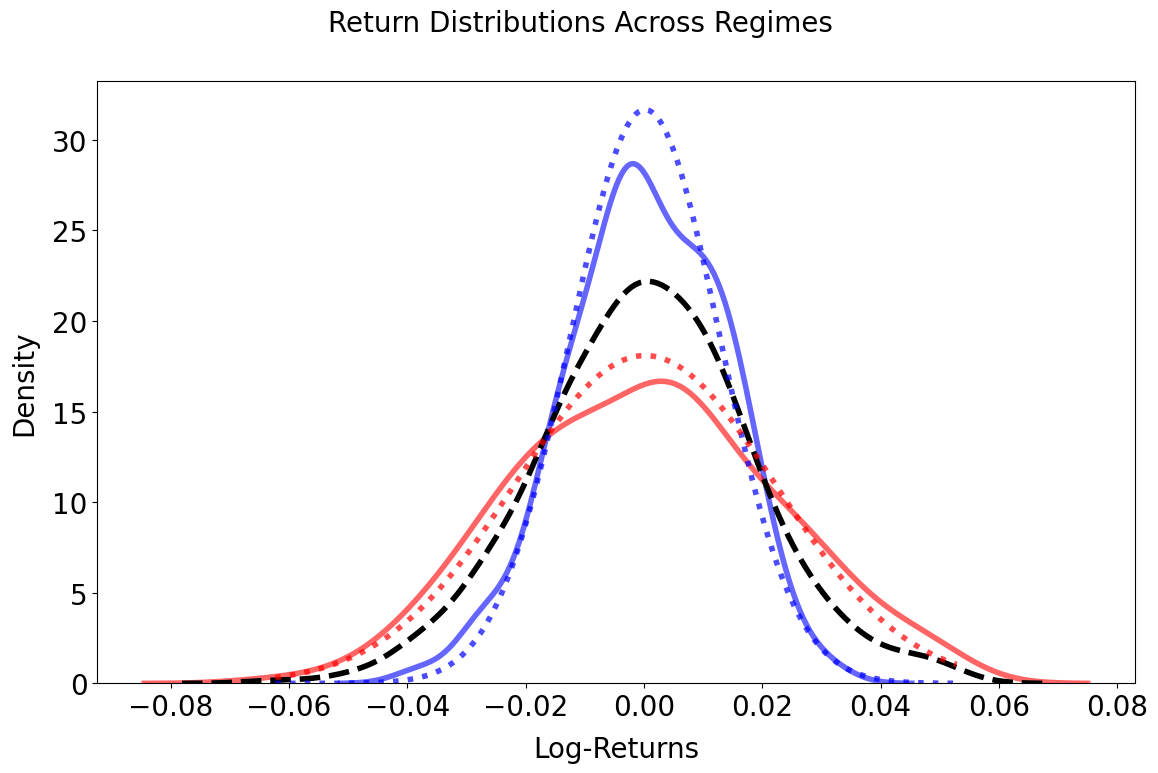

In [ ]:


# Parameters
np.random.seed(None)
n_days = 500
S0 = 100
mu = 0.05
vol1 = 0.20
vol2 = 0.35
dt = 1/252
regime_change_point = 250

# price simu
prices = [S0]
for t in range(n_days):
   vol = vol1 if t < regime_change_point else vol2
   dW = np.random.normal(0, np.sqrt(dt))
   dS = prices[-1] * (mu * dt + vol * dW)
   prices.append(prices[-1] + dS)

prices = np.array(prices)
returns = np.diff(np.log(prices))

# theo norm. fo regimes
x = np.linspace(min(returns), max(returns), 1000)
pdf1 = stats.norm.pdf(x, mu*dt, vol1*np.sqrt(dt))
pdf2 = stats.norm.pdf(x, mu*dt, vol2*np.sqrt(dt))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# KDE Plots
sns.kdeplot(data=returns[:regime_change_point], 
           label='Regime 1 (σ=20%)', 
           color='blue', 
           alpha=0.6,
           linewidth=4)

sns.kdeplot(data=returns[regime_change_point:], 
           label='Regime 2 (σ=35%)', 
           color='red', 
           alpha=0.6,
           linewidth=4)

sns.kdeplot(data=returns, 
           label='Total', 
           color='black', 
           linestyle='--', 
           linewidth=4)

ax.plot(x, pdf1, 'b:', 
      label='Theoretical Regime 1', 
      alpha=0.7,
      linewidth=4)

ax.plot(x, pdf2, 'r:', 
      label='Theoretical Regime 2', 
      alpha=0.7,
      linewidth=4)

ax.set_xlabel('Log-Returns', fontsize=20, labelpad=10)
ax.set_ylabel('Density', fontsize=20, labelpad=10)
plt.suptitle('Return Distributions Across Regimes', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()


# GBM

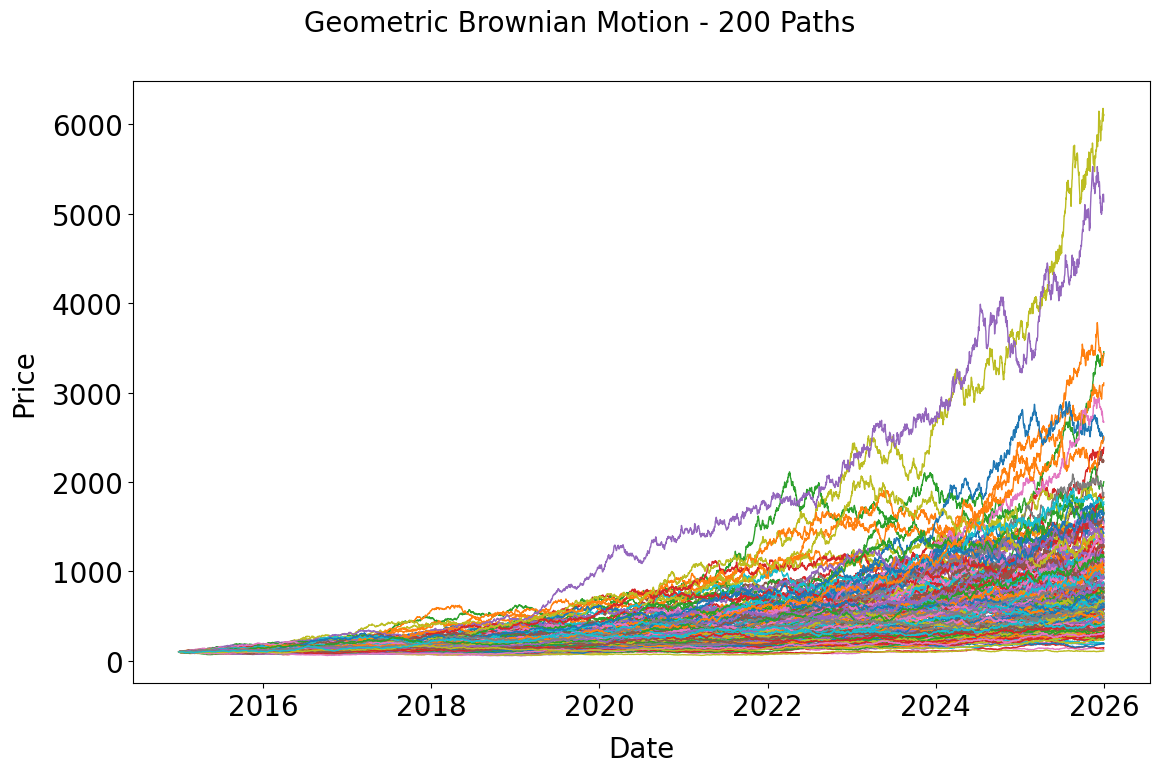

In [ ]:

# Parameters
S0 = 100  #start prie
mu = 0.2  #Drift
sigma = 0.2  #Vola
rf = 0  #risk free rate

start_date = '2015-01-01'
end_date = '2025-12-31'
dates = pd.date_range(start=start_date, end=end_date, freq='D')
T = (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days / 365
N = len(dates)  #timesteps
dt = T/N 

n_sims = 200

S = np.zeros((n_sims, N))
S[:, 0] = S0

for i in range(n_sims):
    for t in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        S[i,t] = S[i,t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.set_facecolor('none')
fig.patch.set_facecolor('none')

for i in range(n_sims):
    plt.plot(dates, S[i,:], alpha=1, linewidth=1)

ax.set_xlabel('Date', fontsize=20, labelpad=10)
ax.set_ylabel('Price', fontsize=20, labelpad=10)
plt.suptitle('Geometric Brownian Motion - 200 Paths', fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

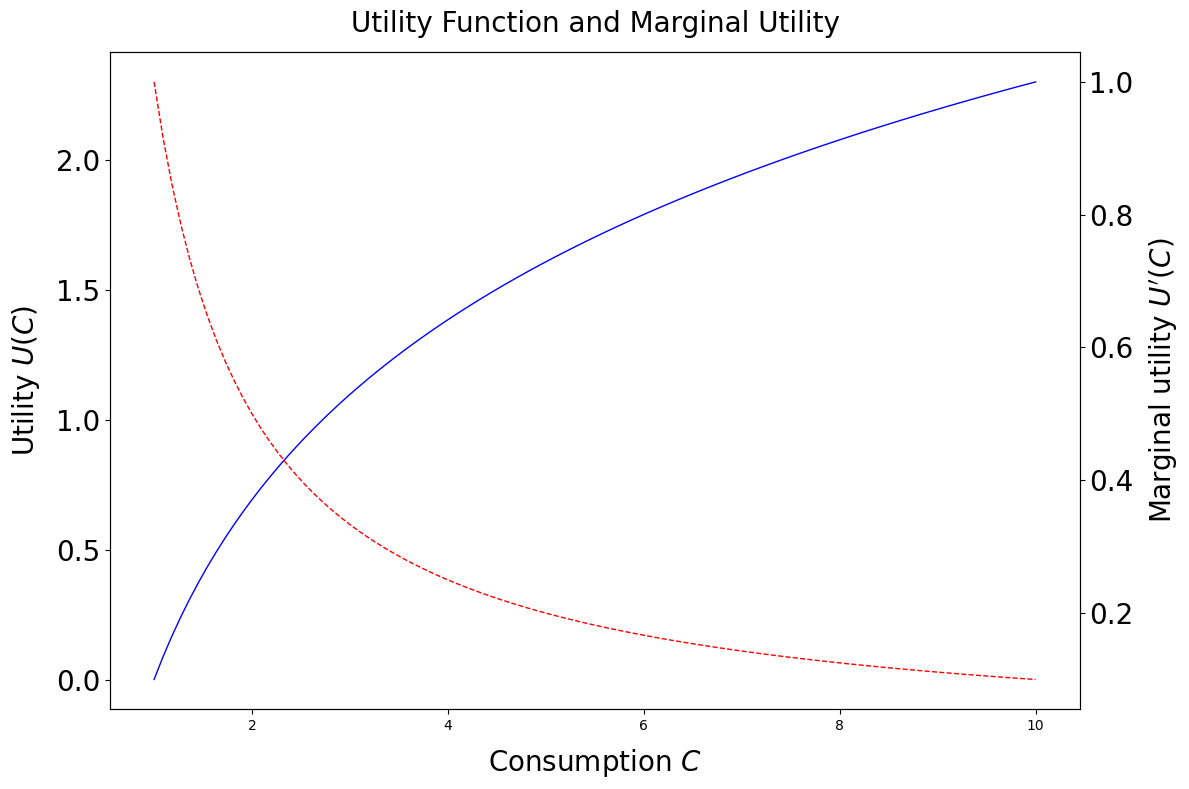

In [ ]:
C = np.linspace(1, 10, 100)
U = np.log(C)         
U_prime = 1 / C     

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)

ax1.set_facecolor('none')
fig.patch.set_facecolor('none')

ax1.plot(C, U, color='blue', linewidth=1, label=r'$U(C) = \ln(C)$')
ax1.set_xlabel('Consumption $C$', fontsize=20, labelpad=10)
ax1.set_ylabel('Utility $U(C)$', fontsize=20, labelpad=10)
ax1.tick_params(axis='y', labelsize=20)

ax2 = ax1.twinx()
ax2.plot(C, U_prime, color='red', linestyle='--', linewidth=1, label=r'$U\'(C) = \frac{1}{C}$')
ax2.set_ylabel('Marginal utility $U\'(C)$', fontsize=20, labelpad=10)
ax2.tick_params(axis='y', labelsize=20)

plt.suptitle('Utility Function and Marginal Utility', fontsize=20)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.tight_layout()
plt.show()

# Classical EPK with Confidence Bands

1. In order to load the .csv files created from the R-script, update the "csv_path" variable
2. Set the "output_dir" variable to define where the plot should be saved

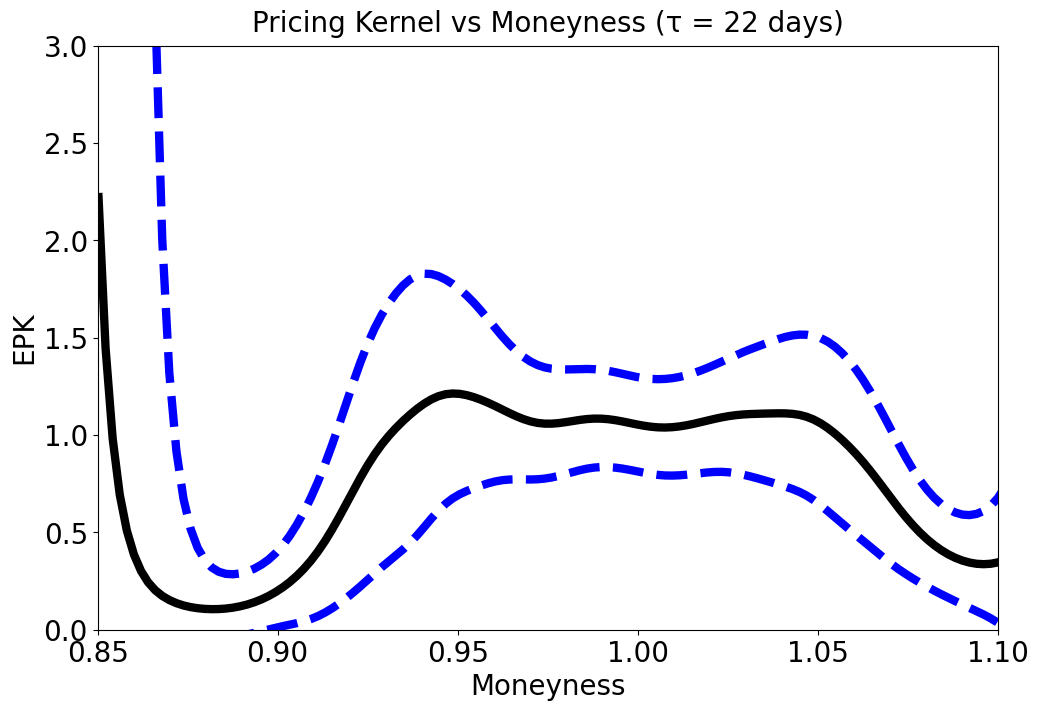

In [60]:


# Path of used csv
csv_path = r'...../epk_results_20200110_tau22.csv'

# output path
output_dir = r'...........'

df = pd.read_csv(csv_path)

plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.15, bottom=0.15)

plt.plot(df['moneyness'], df['epk'], color='black', linewidth=6)
plt.plot(df['moneyness'], df['lower_ci'], color='blue', linewidth=6, linestyle='--')
plt.plot(df['moneyness'], df['upper_ci'], color='blue', linewidth=6, linestyle='--')

plt.xlim(0.85, 1.1)
plt.ylim(0, 3)

plt.title('Pricing Kernel vs Moneyness (τ = 22 days)', pad=10, fontsize=20) # change tau accrodingly!
plt.xlabel('Moneyness', fontsize=20)
plt.ylabel('EPK', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

output_file = os.path.join(output_dir, 'pricing_kernel_CI_BAND_CONSTANT_JUMP.png')
plt.savefig(output_file, 
            dpi=300, 
            bbox_inches='tight',
            transparent=True)

plt.show()

# CDI Plot

1. Update the "directory" variable so it points towards the folder where all MATLAB files are saved that were created when running the MATLAB script

In [ ]:

# set path
directory = r".....\CDI Variablen\EPK per param set CSV"


# get csv
data_4_4 = pd.read_csv(os.path.join(directory, 'epk_data_4_4.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])
data_5_5 = pd.read_csv(os.path.join(directory, 'epk_data_5_5.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])
data_6_6 = pd.read_csv(os.path.join(directory, 'epk_data_6_6.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])
data_7_7 = pd.read_csv(os.path.join(directory, 'epk_data_7_7.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])
data_8_8 = pd.read_csv(os.path.join(directory, 'epk_data_8_8.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])
data_9_9 = pd.read_csv(os.path.join(directory, 'epk_data_9_9.csv'), header=None, names=['Moneyness', 'Pricing_Kernel'])

plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.linewidth': 6
})

def create_single_plot(data, bases, output_file):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    plt.subplots_adjust(left=0.15, bottom=0.15)
    
    ax.plot(data['Moneyness'], data['Pricing_Kernel'], '-', color='purple', linewidth=6)
    ax.set_xlabel('Moneyness', fontsize=20)
    ax.set_ylabel('EPK', fontsize=20)
    
    ax.set_xlim(0.92, 1.06)
    ax.set_ylim(0, 3)
    
    fig.patch.set_facecolor('none')
    ax.patch.set_facecolor('none')
    
    plt.savefig(os.path.join(directory, output_file), format='png', dpi=300, 
                bbox_inches='tight', transparent=True)
    plt.close()
    
    print(f"Plot safed as {output_file} in {directory} ")

def create_combined_plot():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    
    plt.subplots_adjust(left=0.15, bottom=0.15)
    
    ax.plot(data_4_4['Moneyness'], data_4_4['Pricing_Kernel'], '-', color='blue', linewidth=6)
    ax.plot(data_5_5['Moneyness'], data_5_5['Pricing_Kernel'], '-', color='red', linewidth=6)
    ax.plot(data_6_6['Moneyness'], data_6_6['Pricing_Kernel'], '-', color='green', linewidth=6)
    ax.plot(data_7_7['Moneyness'], data_7_7['Pricing_Kernel'], '-', color='black', linewidth=6)
    ax.plot(data_8_8['Moneyness'], data_8_8['Pricing_Kernel'], '-', color='cyan', linewidth=6)
    ax.plot(data_9_9['Moneyness'], data_9_9['Pricing_Kernel'], '-', color='magenta', linewidth=6)
    
    ax.set_xlabel('Moneyness', fontsize=20)
    ax.set_ylabel('EPK', fontsize=20)
    
    ax.set_xlim(0.92, 1.06)
    ax.set_ylim(0, 3)
    
    fig.patch.set_facecolor('none')
    ax.patch.set_facecolor('none')
    
    plt.savefig(os.path.join(directory, 'epk_combined.png'), format='png', dpi=300, 
                bbox_inches='tight', transparent=True)
    plt.close()
    

create_single_plot(data_4_4, 4, 'epk_4_bases.png')
create_single_plot(data_5_5, 5, 'epk_5_bases.png')
create_single_plot(data_6_6, 6, 'epk_6_bases.png')
create_single_plot(data_7_7, 7, 'epk_7_bases.png')
create_single_plot(data_8_8, 8, 'epk_8_bases.png')
create_single_plot(data_9_9, 9, 'epk_9_bases.png')
create_combined_plot()

Plot wurde als epk_4_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.
Plot wurde als epk_5_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.
Plot wurde als epk_6_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.
Plot wurde als epk_7_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.
Plot wurde als epk_8_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.
Plot wurde als epk_9_bases.png im Verzeichnis C:\Users\levin\Desktop\Pricing Kernel\CDI Code\MATLAB Code\CDI Variablen\EPK per param set CSV gespeichert.


# CDI multiple simu per plot

1. Update the "directory" variable so it points towards the folder where all MATLAB files are saved that were created when running the MATLAB script

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

data_dir = r"......." #UPDATE

os.chdir(data_dir)

def load_datasets():
    datasets = {4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
    
    csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
    
    for file in csv_files:
        filename = os.path.basename(file)
        if not filename.startswith('epk_data'):
            continue
            
        param = int(filename.split('_')[2])
        if param in datasets:
            data = pd.read_csv(file, header=None, 
                                names=['Moneyness', 'Pricing_Kernel'])
            datasets[param].append(data)

            
    return datasets

def create_single_plot(datasets, param, output_file):
    if not datasets[param]:
        print(f"No data available for parameter {param}")
        return
        
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(111)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(datasets[param])))
    
    for i, data in enumerate(datasets[param]):
        ax.plot(data['Moneyness'], data['Pricing_Kernel'], '-', 
                color=colors[i])
    
    ax.set_xlabel('Moneyness')
    ax.set_ylabel('Pricing Kernel')
    ax.set_title(f'Parameter Set {param}/{param}')
    
    ax.set_xlim(0.92, 1.06)
    ax.set_ylim(0, 3)
    
    plt.tight_layout()
    
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)
    #plt.show()
    
    output_path = os.path.join(data_dir, output_file)
    plt.savefig(output_path, format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.close()


datasets = load_datasets()

for param in datasets:
    print(f"Parameter {param}: {len(datasets[param])} datasets loaded")

for param in [4, 5, 6, 7, 8, 9]:
    create_single_plot(datasets, param, f'epk_{param}_bases.png')



Parameter 4: 7 datasets loaded
Parameter 5: 7 datasets loaded
Parameter 6: 7 datasets loaded
Parameter 7: 7 datasets loaded
Parameter 8: 7 datasets loaded
Parameter 9: 7 datasets loaded


# Extended Experiment Plot

1. Update the "directory" variable so it points towards the folder where all MATLAB files are saved that were created when running the MATLAB script

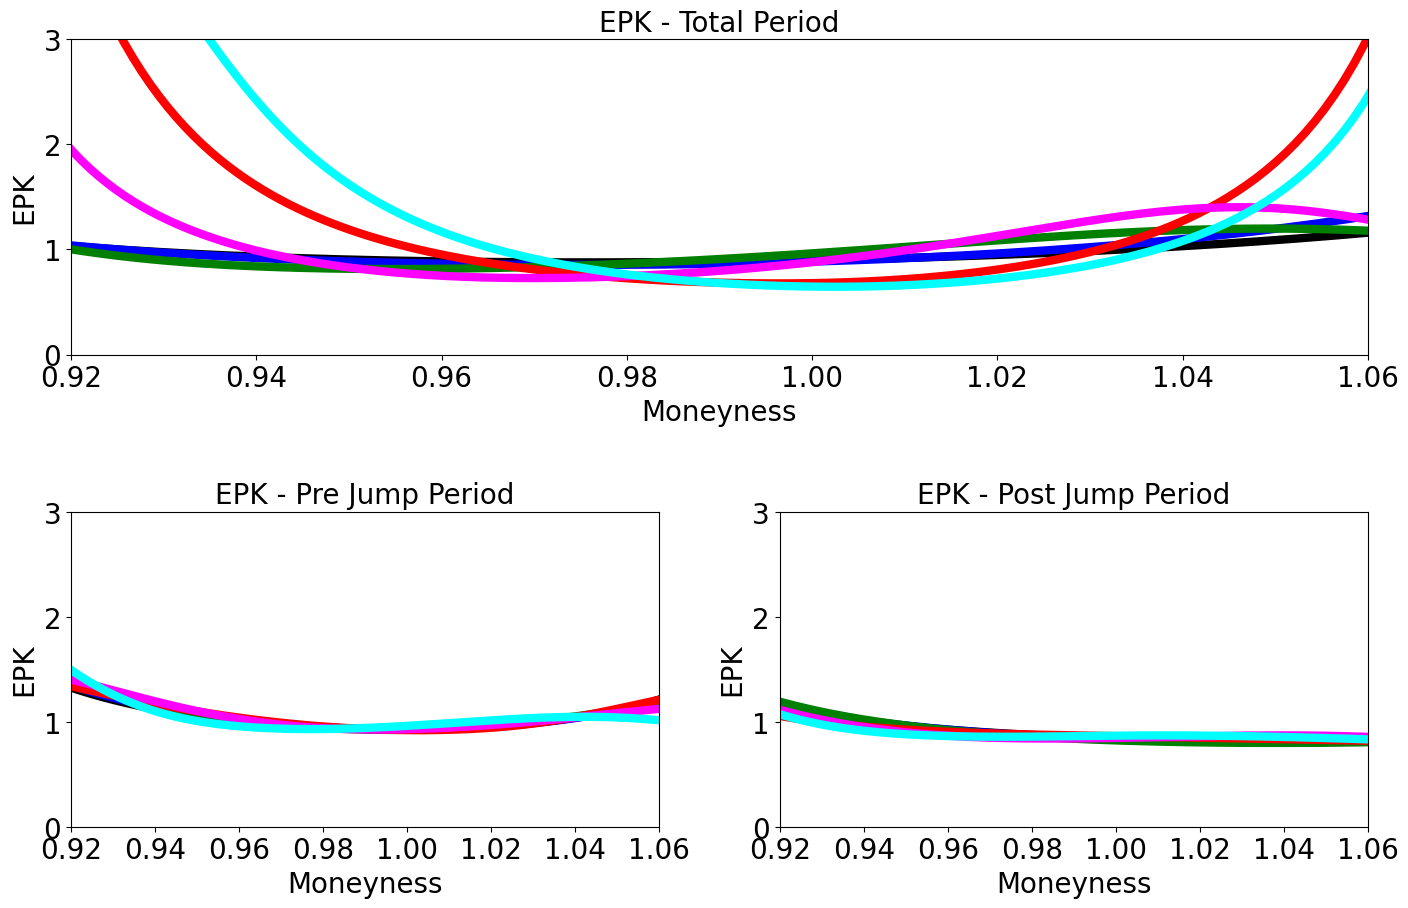

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


data_dir = r"........" #UPDATE

os.chdir(data_dir)

def load_data(prefix):
    data_sets = []
    for i in range(4, 10):
        filename = f'{prefix}_epk_data_{i}_{i}.csv'
        data = pd.read_csv(filename, header=None, names=['Moneyness', 'Pricing_Kernel'])
        data_sets.append(data)
    return data_sets

total_data = load_data('total')
pre_data = load_data('pre')
post_data = load_data('post')

fig = plt.figure(figsize=(15, 10))
fig.patch.set_alpha(0)

plt.style.use('default')
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.linewidth': 6,
    'figure.subplot.wspace': 0.3,
    'figure.subplot.hspace': 0.4
})

colors = ['black', 'blue', 'green', 'red', 'magenta', 'cyan']

# TOTAL case - big plot
ax1 = plt.subplot(2, 1, 1)
ax1.patch.set_alpha(0)  
for i, data in enumerate(total_data):
    ax1.plot(data['Moneyness'], data['Pricing_Kernel'], 
             color=colors[i], 
             label=legend_labels[i])
ax1.set_xlabel('Moneyness')
ax1.set_ylabel('EPK')
ax1.set_title('EPK - Total Period')
ax1.set_xlim(0.92, 1.06)
ax1.set_ylim(0, 3)

# PRE JUMP 
ax2 = plt.subplot(2, 2, 3)
ax2.patch.set_alpha(0)  
for i, data in enumerate(pre_data):
    ax2.plot(data['Moneyness'], data['Pricing_Kernel'], 
             color=colors[i])
ax2.set_xlabel('Moneyness')
ax2.set_ylabel('EPK')
ax2.set_title('EPK - Pre Jump Period')
ax2.set_xlim(0.92, 1.06)
ax2.set_ylim(0, 3)

# POST JUMP 
ax3 = plt.subplot(2, 2, 4)
ax3.patch.set_alpha(0)  
for i, data in enumerate(post_data):
    ax3.plot(data['Moneyness'], data['Pricing_Kernel'], 
             color=colors[i])
ax3.set_xlabel('Moneyness')
ax3.set_ylabel('EPK')
ax3.set_title('EPK - Post Jump Period')
ax3.set_xlim(0.92, 1.06)
ax3.set_ylim(0, 3)

plt.tight_layout(pad=2.0)

# safe as
plt.savefig('EPK_estimation_results_all_kernels.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True,
            facecolor='none',
            edgecolor='none')
plt.show()